# DATA ANALYSIS PYTHON PROJECT - BLINKIT ANALYSIS

In [55]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
#importing raw data
df= pd.read_csv("E:\Data Ananlysis projects(Power bi)\Blinkit\BlinkIT Grocery Data.csv")

In [38]:
#Top 10 rows
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Total Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


In [39]:
#Size of data
print("Shape of Data::",df.shape)

Shape of Data:: (8523, 12)


In [40]:
#Columns Info
df.columns


Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Total Sales', 'Rating'],
      dtype='object')

In [41]:
#Datatypes of columns
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Total Sales                  float64
Rating                       float64
dtype: object

In [42]:
#Uniques values from frist column
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [43]:
df['Item Fat Content']=df['Item Fat Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [44]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


## BUSINESS REQUIREMENTS
## KPI's REQUIREMENTS

In [45]:
#total sales
total_sales=df['Total Sales'].sum()

#average sales
avg_sales=df['Total Sales'].mean()

#No of items
no_of_items=df['Item Fat Content'].count()

#average ratins
avg_ratings=df['Rating'].mean()

print("total_sales::",total_sales)
print("Average Sales::",avg_sales)
print("No of items::",no_of_items)
print("Average ratins::",avg_ratings)

total_sales:: 1201681.4808
Average Sales:: 140.9927819781767
No of items:: 8523
Average ratins:: 3.965857092573038


In [46]:
total_sales

np.float64(1201681.4808)

In [47]:
no_of_items

np.int64(8523)

## CHARTS REQUIREMENTS

#### Total Sales by Fat Content

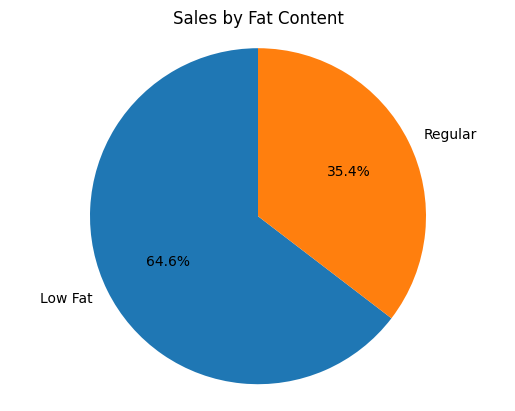

In [56]:
sales_by_fat=df.groupby('Item Fat Content')['Total Sales'].sum()
plt.pie(sales_by_fat,labels=sales_by_fat.index ,autopct='%.1f%%',startangle=90
        )
plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

### Total Sales by Item Type

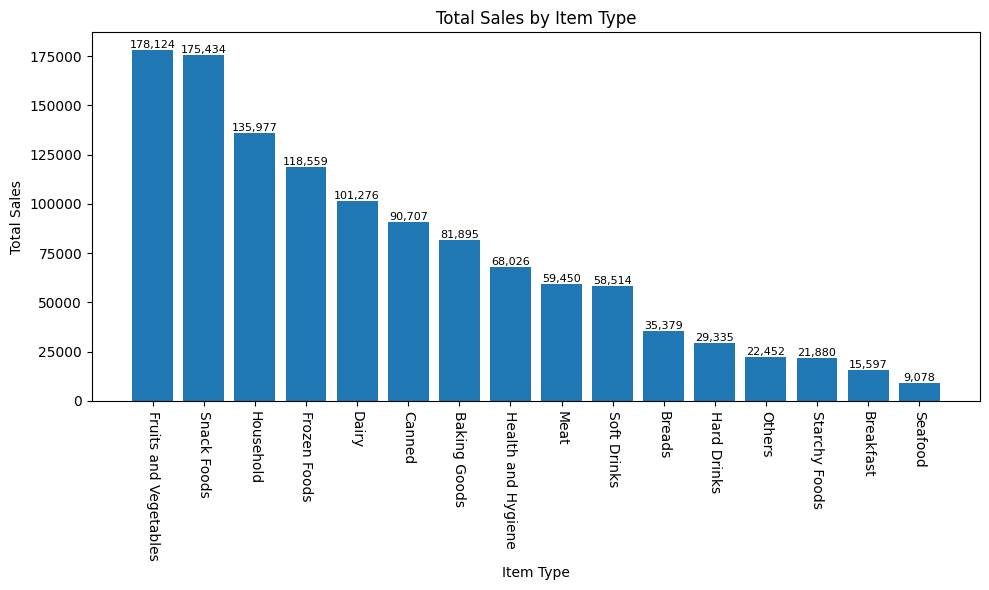

In [58]:
sales_by_type=df.groupby('Item Type')['Total Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
bars=plt.bar(sales_by_type.index,sales_by_type.values)

plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2,bar.get_height(),
             f'{bar.get_height():,.0f}',ha='center',va='bottom',fontsize=8)
    
plt.tight_layout()
plt.show()

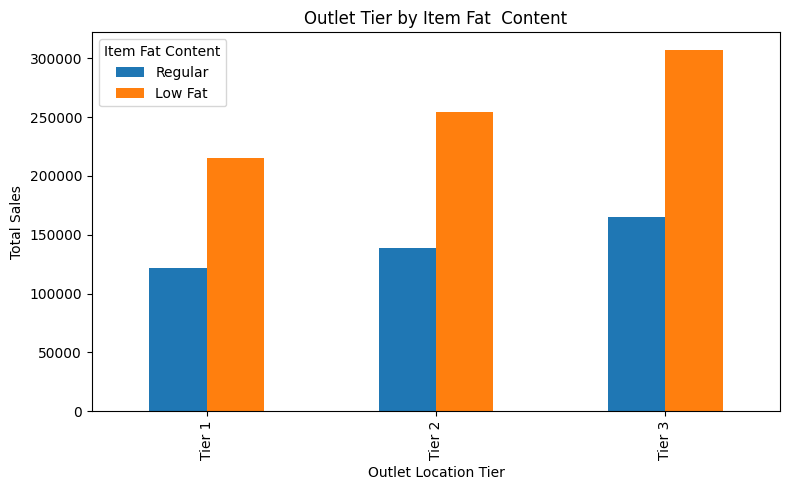

In [60]:
#Fat content by Outlet for Totol Sales
grouped=df.groupby(['Outlet Location Type','Item Fat Content'])['Total Sales'].sum().unstack()
grouped=grouped[['Regular','Low Fat']]
ax=grouped.plot(kind='bar',figsize=(8,5),title='Outlet Tier by Item Fat  Content')

plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()